In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *

import joblib
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
'''from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models'''


'from pytorch_tabnet.tab_model import TabNetRegressor, TabNetClassifier\nimport numpy as np\nimport tensorflow as tf\nfrom tensorflow.keras import layers, models'

In [ ]:
import pandas as pd

#reading the data and making sure to randomize the data at least once
#the randomaization purpose is to provide a better overview on the data for the model
#allowing for better generalization for all the models and to have a fair comparison between all of them
df = pd.read_csv("/content/drive/MyDrive/rema/REMA_Full_Data.csv")
df = df.sample(frac=1).reset_index(drop=True)
df

,bedroom,price_clean,Neighborhood,listing,type,building_age_years,furnishing,land_area,number_of_floors,City,floor_lower,surface_area,bathroom,floor,floor_numeric
0,2.0,15000.0,386,sale,0,14.5,0.0,0.0,1.0,2,ground floor,85.0,2.0,0.0,0.0
1,2.0,202020.0,30,sale,0,14.5,0.0,0.0,1.0,3,ground floor,75.0,1.0,0.0,0.0
2,2.0,15000.0,10,rent,apartment,7.5,1.0,NaN,1.0,2,ground floor,105.0,2.0,ground floor,0.0
3,2.0,25.0,48,rent,apartment,14.5,1.0,NaN,1.0,3,third floor,70.0,1.0,third floor,3.0
4,3.0,30000.0,10,rent,apartment,3.0,1.0,NaN,1.0,2,ground floor,205.0,3.0,ground floor,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11647,4.0,160000.0,330,sale,0,20.0,0.0,0.0,1.0,2,ground floor,260.0,4.0,0.0,0.0
11648,3.0,320000.0,220,sale,1,20.0,0.0,616.0,2.0,2,ground floor,200.0,3.0,0.0,0.0
11649,1.0,399.0,135,rent,apartment,3.0,1.0,NaN,1.0,2,second floor,60.0,1.0,second floor,2.0
11650,3.0,98000.0,327,sale,0,0.5,0.0,0.0,1.0,2,ground floor,150.0,3.0,0.0,0.0


In [ ]:
df.shape

(11652, 15)

In [ ]:
df.columns

Index(['bedroom', 'price_clean', 'Neighborhood', 'listing', 'type',
       'building_age_years', 'furnishing', 'land_area', 'number_of_floors',
       'City', 'floor_lower', 'surface_area', 'bathroom', 'floor',
       'floor_numeric'],
      dtype='object')

In [ ]:
df[df.duplicated()]


,bedroom,price_clean,Neighborhood,listing,type,building_age_years,furnishing,land_area,number_of_floors,City,floor_lower,surface_area,bathroom,floor,floor_numeric
28,3.0,20.0,258,rent,apartment,14.5,1.0,NaN,1.0,4,second floor,90.0,1.0,second floor,2.0
75,3.0,20.0,258,rent,apartment,3.0,1.0,NaN,1.0,4,second floor,100.0,1.0,second floor,2.0
273,0.5,25.0,6,rent,apartment,0.5,1.0,NaN,1.0,2,ground floor,50.0,1.0,ground floor,0.0
274,0.5,30.0,244,rent,apartment,0.5,1.0,NaN,1.0,2,first floor,50.0,1.0,first floor,1.0
275,3.0,19900.0,11,rent,apartment,7.5,0.5,NaN,1.0,2,first floor,278.0,4.0,first floor,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11382,0.0,180000.0,71,sale,3,20.0,0.0,309.0,4.0,2,0,670.0,0.0,0.0,0.0
11474,0.0,55000.0,198,sale,3,20.0,0.0,200.0,3.0,13,0,600.0,0.0,0.0,0.0
11485,0.0,375000.0,214,sale,3,20.0,0.0,700.0,3.0,2,0,700.0,0.0,0.0,0.0
11518,0.0,45000.0,438,sale,3,20.0,0.0,120.0,3.0,2,0,100.0,0.0,0.0,0.0


In [ ]:
#doing the last step in preprocessing
type_dict = {
    "apartment":0,
    "villas and palaces":2,
    "farms and chalets":4
}
df["type"] = df["type"].replace(type_dict).astype(int)


In [ ]:
df.drop(columns=['land_area','floor_lower','floor'], inplace=True)
##or use REMA_Full_Data_V2 later

X = df.drop(columns=['price_clean'])
y = np.log1p(df["price_clean"])

In [ ]:
X

,bedroom,Neighborhood,listing,type,building_age_years,furnishing,number_of_floors,City,surface_area,bathroom,floor_numeric
0,5.0,10,rent,0,7.5,1.0,1.0,2,600.0,5.0,0.0
1,5.0,410,sale,1,20.0,0.5,1.0,2,180.0,3.0,0.0
2,0.5,48,rent,0,0.5,1.0,1.0,3,25.0,1.0,2.0
3,4.0,62,rent,0,14.5,0.0,1.0,2,350.0,4.0,3.0
4,3.0,202,sale,2,7.5,0.5,3.0,2,500.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11647,2.0,10,rent,0,14.5,1.0,1.0,2,200.0,2.0,-1.0
11648,0.5,249,rent,0,7.5,1.0,1.0,2,55.0,1.0,0.0
11649,3.0,216,rent,0,0.5,0.0,1.0,2,125.0,3.0,0.0
11650,2.0,135,rent,0,7.5,1.0,1.0,2,135.0,2.0,1.0


In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist() #for all required numerical features
cat_cols = X.select_dtypes(include=['object']).columns.tolist() #for all required categorical features

In [ ]:
print(num_cols)
print(cat_cols)

['bedroom', 'Neighborhood', 'type', 'building_age_years', 'furnishing', 'number_of_floors', 'City', 'surface_area', 'bathroom', 'floor_numeric']
['listing']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()

X_train_num = sc.fit_transform(X_train[num_cols])
X_test_num  = sc.transform(X_test[num_cols])

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = enc.fit_transform(X_train[cat_cols])
X_test_cat  = enc.transform(X_test[cat_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final  = np.hstack([X_test_num, X_test_cat])

In [ ]:
##################### BEST RFR MODEL #####################

In [ ]:
rf = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
rf.fit(X_train_final, y_train)

rf_preds = rf.predict(X_test_final)

pred_real = np.expm1(rf_preds) #_log
y_test_real = np.expm1(y_test)

print("\n#####################################")
print("\n###### RANDOM FOREST RESULTS ########")
print("\n#####################################")

print("MAE ==> ", mean_absolute_error(y_test_real, pred_real))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test_real, pred_real)))
print("R2 ==> ", r2_score(y_test, rf_preds))

joblib.dump(rf, "REMA_rfr_model.pkl")


#####################################

###### RANDOM FOREST RESULTS ########

#####################################
MAE ==>  30838.361422576818
RMSE ==>  92575.39171473526
R2 ==>  0.8985550386856846


['REMA_rfr_model.pkl']

In [ ]:
##################### BEST RFR MODEL #####################

In [ ]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf.fit(X_train_final, y_train)

rf_preds = rf.predict(X_test_final)

print("\n#####################################")
print("\n###### RANDOM FOREST RESULTS ########")
print("\n#####################################")

print("MAE ==> ", mean_absolute_error(y_test, rf_preds))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("R2 ==> ", r2_score(y_test, rf_preds))

joblib.dump(rf, "REMA_rfr_model.pkl")


#####################################

###### RANDOM FOREST RESULTS ########

#####################################
MAE ==>  33182.96714546098
RMSE ==>  99517.74526910162
R2 ==>  0.707073605122286


['REMA_rfr_model.pkl']

In [ ]:
##################### BEST XGBR MODEL #####################

y = np.log1p(df["price_clean"])
X = df.drop(columns=["price_clean"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sclr = StandardScaler()

X_train_num = sclr.fit_transform(X_train[num_cols])
X_test_num  = sclr.transform(X_test[num_cols])

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final  = np.hstack([X_test_num, X_test_cat])

xgbr = XGBRegressor(n_estimators=500,  learning_rate=0.01,  max_depth=10)
xgbr.fit(X_train_final, y_train)

xgbr_preds = xgbr.predict(X_test_final)

pred_real = np.expm1(xgbr_preds)
y_test_real = np.expm1(y_test)

print("\n#####################################")
print("\n########### { XGBR MODEL } ##########")
print("\n#####################################\n")

print("MAE ==> ", mean_absolute_error(y_test_real, pred_real))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test_real, pred_real)))
print("R2 ==> ", r2_score(y_test, xgbr_preds))

joblib.dump(xgbr, "REMA_xgbr_model.pkl")


#####################################

########### { XGBR MODEL } ##########

#####################################

MAE ==>  28913.752642199903
RMSE ==>  90745.91878000571
R2 ==>  0.9046929510373821


['REMA_xgbr_model.pkl']

In [ ]:
import joblib
joblib.dump(pipeline, "model_pipeline.pkl")

##################### BEST XGBR MODEL #####################

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num  = scaler.transform(X_test[num_cols])

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final  = np.hstack([X_test_num, X_test_cat])

from sklearn.ensemble import RandomForestRegressor

xgbr = XGBRegressor(n_estimators=500,  learning_rate=0.01,  max_depth=10)
xgbr.fit(X_train_final, y_train)

xgbr_preds = xgbr.predict(X_test_final)

print("\n#####################################")
print("\n########### { XGBR MODEL } ##########")
print("\n#####################################\n")

print("MAE ==> ", mean_absolute_error(y_test, xgbr_preds))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test, xgbr_preds)))
print("R2 ==> ", r2_score(y_test, xgbr_preds))

joblib.dump(xgbr, "REMA_xgbr_model.pkl")


#####################################

########### { XGBR MODEL } ##########

#####################################

MAE ==>  29299.13937536057
RMSE ==>  92420.97250163047
R2 ==>  0.7473620904322174


['REMA_xgbr_model.pkl']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sclr = StandardScaler()

X_train_num = sclr.fit_transform(X_train[num_cols])
X_test_num  = sclr.transform(X_test[num_cols])

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

X_train_cat = enc.fit_transform(X_train[cat_cols])
X_test_cat  = enc.transform(X_test[cat_cols])

X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final  = np.hstack([X_test_num, X_test_cat])

xgbr = XGBRegressor(n_estimators=500,  learning_rate=0.01,  max_depth=12)
xgbr.fit(X_train_final, y_train)

xgbr_preds = xgbr.predict(X_test_final)

print("\n#####################################")
print("\n########### { XGBR MODEL } ##########")
print("\n#####################################\n")

print("MAE ==> ", mean_absolute_error(y_test, xgbr_preds))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test, xgbr_preds)))
print("R2 ==> ", r2_score(y_test, xgbr_preds))

joblib.dump(xgbr, "REMA_xgbr_model.pkl")


#####################################

########### { XGBR MODEL } ##########

#####################################

MAE ==>  28887.556061638727
RMSE ==>  94340.49400567973
R2 ==>  0.7367588719984702


['REMA_xgbr_model.pkl']

In [ ]:
###################################

In [ ]:
y = np.log1p(df["price_clean"])
X = df.drop(columns=["price_clean"])

In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

print("numerical columns  ==>", num_cols)
print("categorical columns ==> ", cat_cols)

Numerical columns: ['bedroom', 'Neighborhood', 'type', 'building_age_years', 'furnishing', 'number_of_floors', 'City', 'surface_area', 'bathroom', 'floor_numeric']
Categorical columns: ['listing']


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ],
    remainder='drop'
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_dl = X_train_processed
X_test_dl = X_test_processed


In [ ]:
MLPmodel = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_dl.shape[1],)),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

optAdamW = keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.00001
)

MLPmodel.compile(
    optimizer=optAdamW,
    loss='mse',
    metrics=['mae', 'mse']
)

MLPmodel.summary()

history = MLPmodel.fit(
    X_train_dl, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=512,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 512)            │         6,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,201 (700.00 KB)

 Trainable params: 179,201 (700.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - loss: 68.8194 - mae: 7.5300 - mse: 68.8194 - val_loss: 11.1620 - val_mae: 2.4844 - val_mse: 11.1620
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 10.4076 - mae: 2.3886 - mse: 10.4076 - val_loss: 4.3111 - val_mae: 1.6688 - val_mse: 4.3111
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 5.1680 - mae: 1.7636 - mse: 5.1680 - val_loss: 3.2117 - val_mae: 1.4732 - val_mse: 3.2117
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 4.1758 - mae: 1.6289 - mse: 4.1758 - val_loss: 2.2089 - val_mae: 1.1583 - val_mse: 2.2089
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.4314 - mae: 1.4411 - mse: 3.4314 - val_loss: 1.8472 - val_mae: 1.0450 - val_mse: 1.8472
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 3.1147 - mae: 1.3777 - mse: 3.1147 - val_loss: 1.6361 - val_mae: 0.9793 - val_mse: 1.6361
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.8653 - mae: 1.3330 - mse: 2.8653 - val_

In [ ]:
y_preds = model.predict(X_test_processed).reshape(-1)   #flatten predSs

pred_real = np.expm1(y_preds)
y_test_real = np.expm1(y_test)

print("\n#########################################")
print("\n##### REGRESSION MODEL ==>  { MLP } #####")
print("\n#########################################")

print("MAE ==> ", mean_absolute_error(y_test_real, pred_real))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test_real, pred_real)))
print("R2 Score ==> ", r2_score(y_test, y_preds))



73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

#########################################

##### REGRESSION MODEL ==>  { MLP } #####

#########################################
MAE ==>  77378.19090628409
RMSE ==>  188735.61777784463
R2 Score ==>  0.6903543565320556


In [ ]:
y_pred = model.predict(X_test_processed).reshape(-1)   #flatten predSs

print("\n#########################################")
print("\n##### REGRESSION MODEL ==>  { MLP } #####")
print("\n#########################################")

print("MAE ==> ", mean_absolute_error(y_test, y_pred))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score ==> ", r2_score(y_test, y_pred))



73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

#########################################

##### REGRESSION MODEL ==>  { MLP } #####

#########################################
MAE ==>  45323.300754228
RMSE ==>  122100.12589559247
R2 Score ==>  0.5590496674555753


In [ ]:
#########################################

In [ ]:
!pip install pytorch-tabnet

import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00


In [ ]:
y = np.log1p(df["price_clean"])
X = df.drop(columns=["price_clean"])

In [ ]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

In [ ]:
X_train_p = preprocessor.fit_transform(X_train)
X_test_p = preprocessor.transform(X_test)

X_train_np = X_train_p.astype(np.float32)
X_test_np = X_test_p.astype(np.float32)
y_train_np = y_train.values.reshape(-1,1).astype(np.float32)
y_test_np = y_test.values.reshape(-1,1).astype(np.float32)

In [ ]:
# building tbnetregressor model making sure it includes the requires parameters
tabnet = TabNetRegressor(n_d=64,
                         n_a=64,
                         n_steps=5,
                         optimizer_fn=torch.optim.Adam)

tabnet.fit(
    X_train_np, y_train_np,
    max_epochs=50,
    patience=20,
    batch_size=512,
    virtual_batch_size=128
)

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 12.13969|  0:00:04s
epoch 1  | loss: 2.30161 |  0:00:09s
epoch 2  | loss: 2.06485 |  0:00:12s
epoch 3  | loss: 1.7604  |  0:00:16s
epoch 4  | loss: 1.45797 |  0:00:18s
epoch 5  | loss: 1.50266 |  0:00:21s
epoch 6  | loss: 1.48418 |  0:00:23s
epoch 7  | loss: 1.43394 |  0:00:24s
epoch 8  | loss: 1.42284 |  0:00:26s
epoch 9  | loss: 1.32503 |  0:00:28s
epoch 10 | loss: 1.33436 |  0:00:30s
epoch 11 | loss: 1.33879 |  0:00:32s
epoch 12 | loss: 1.35316 |  0:00:34s
epoch 13 | loss: 1.24751 |  0:00:36s
epoch 14 | loss: 1.30083 |  0:00:38s
epoch 15 | loss: 1.22345 |  0:00:40s
epoch 16 | loss: 1.24356 |  0:00:42s
epoch 17 | loss: 1.24554 |  0:00:49s
epoch 18 | loss: 1.28835 |  0:00:54s
epoch 19 | loss: 1.21753 |  0:01:00s
epoch 20 | loss: 1.29369 |  0:01:04s
epoch 21 | loss: 1.25484 |  0:01:09s
epoch 22 | loss: 1.20655 |  0:01:13s
epoch 23 | loss: 1.22954 |  0:01:19s
epoch 24 | loss: 1.18954 |  0:01:22s
epoch 25 | loss: 1.1607  |  0:01:25s
epoch 26 | loss: 1.1268  |  0:01:28s
e

In [ ]:
y_preds = tabnet.predict(X_test_np).reshape(-1)

pred_real = np.expm1(y_preds)
y_test_real = np.expm1(y_test)

print("\n################################################)
print("\n##### REGRESSION MODEL { TabNet Regressor} #####")
print("\n################################################")

print("MAE ==> ", mean_absolute_error(y_test_real, pred_real))
print("RMSE ==> ", np.sqrt(mean_squared_error(y_test_real, pred_real)))
print("R2 Score ==> ", r2_score(y_test, y_preds))



#######################################

##### REGRESSION MODEL { TabNet } #####

#######################################
MAE ==>  43524.92770011964
RMSE ==>  121146.37810913322
R2 Score ==>  0.8414362547735346


In [ ]:
############################################

In [ ]:
final_r2Dict = {
    "XGBR": 0.9046929510373821,
    "RFR": 0.8985550386856846,
    "TabNetReg": 0.8414362547735346,
    "MLP-R": 0.6903543565320556,
    "FT-Transformer": 0.5233580466801973
}


/tmp/ipython-input-243288305.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mod_names,y=r2_scores,palette="bright")


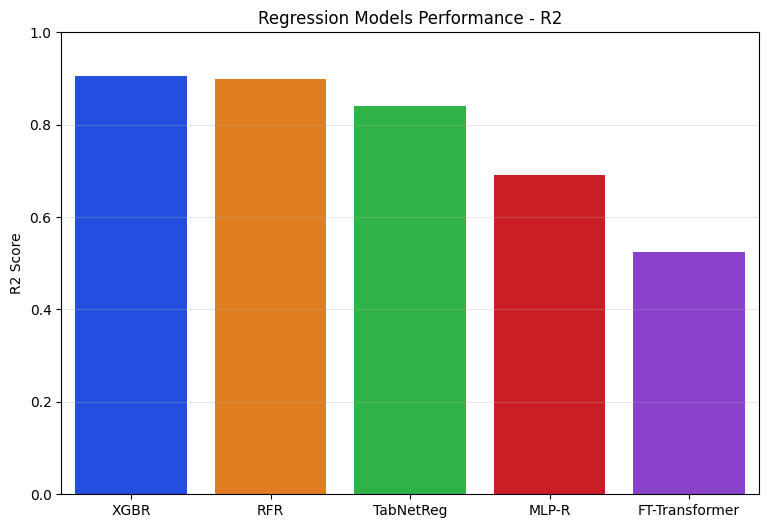

In [ ]:
mod_names = list(final_r2Dict.keys())
r2_scores = list(final_r2Dict.values())

#showcasing the final results of our optimized regression models
plt.figure(figsize=(9, 6))
sns.barplot(x=mod_names,y=r2_scores,palette="bright")
plt.ylim(0, 1)
plt.ylabel("R2 Score")
plt.title("Regression Models Performance - R2")
plt.grid(axis="y", alpha=0.3)

plt.show()